In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/pwn1/Downloads/kaggle/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df=df.drop(df.columns[[0,3,8,10]], axis=1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.Sex.replace(['male', 'female'], [1, 0], inplace=True)

In [6]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

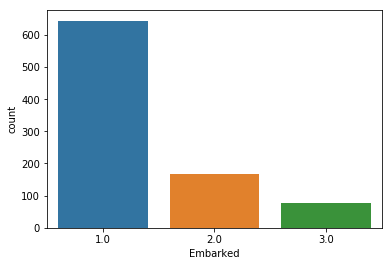

array([ 1.,  2.,  3., nan])

In [9]:
import seaborn as sns
sns.countplot(df.Embarked)
plt.show()
df.Embarked.unique()

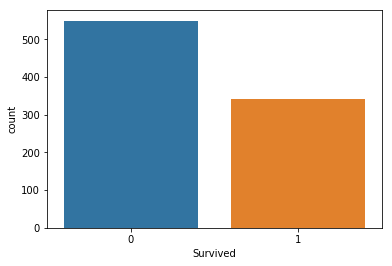

array([0, 1])

In [10]:
sns.countplot(df.Survived)
plt.show()
df.Survived.unique()

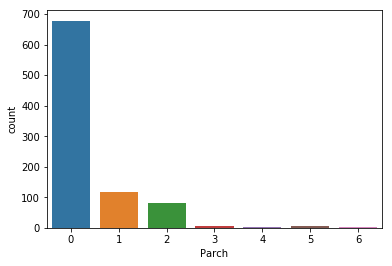

array([0, 1, 2, 5, 3, 4, 6])

In [11]:
sns.countplot(df.Parch)
plt.show()
df.Parch.unique()

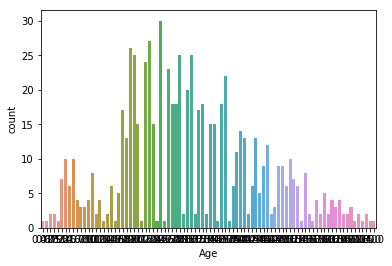

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [12]:
sns.countplot(df.Age)
plt.show()
df.Age.unique()

In [13]:
df["Age"].fillna(0, inplace=True)
df['Age'].replace(0, 28,inplace=True)

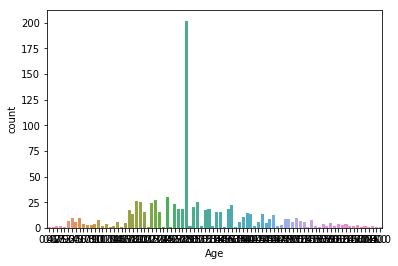

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
sns.countplot(df.Age)
plt.show()
df.Age.unique()

In [15]:
df=df.dropna(subset=['Embarked'])


In [16]:
df.Embarked.unique()

array([1., 2., 3.])

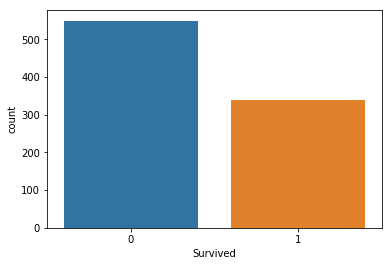

In [17]:
import seaborn as sns
sns.countplot(df.Survived)
plt.show()

##shows if output has classes

In [18]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,1.362205
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [19]:
#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
#replace 0 with nan #Replaced all 0 values by NaN so it is easy to clean the data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [20]:
#df.fillna(df.mean(), inplace = True) #Filled Mising values with Mean
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

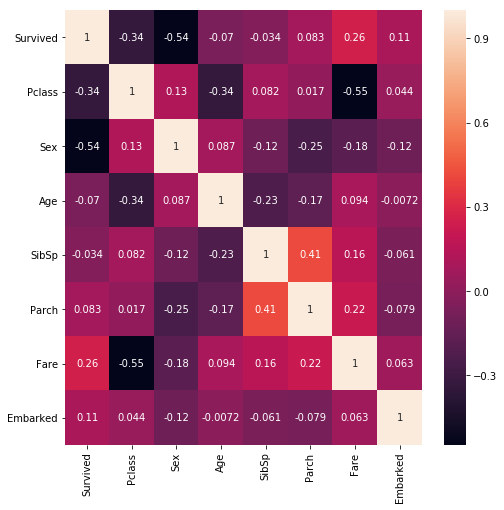

In [22]:
#correlation matrix

import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.show()

In [23]:
#feature selection if corr wasnt enough
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[1:8]]
y=df.Survived
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Fare,0.275648
Age,0.265769
Sex,0.247991
Pclass,0.092542
SibSp,0.046134
Parch,0.038337
Embarked,0.033579


In [24]:
from sklearn.cross_validation import train_test_split

features = df[["Fare",'Age','Sex']]
labels = df.Survived
features.head()


/home/pwn1/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Fare,Age,Sex
0,7.2500,22.0,1
1,71.2833,38.0,0
2,7.9250,26.0,0
3,53.1000,35.0,0
4,8.0500,35.0,1


In [25]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,stratify=df.Survived,test_size=0.4)
#split for CV

In [26]:
#DTClassifier
from sklearn.tree import DecisionTreeClassifier 
dtclf = DecisionTreeClassifier()
dtclf.fit(features_train,labels_train)
dtclf.score(features_test,labels_test)
#decision trees

0.7415730337078652

In [27]:
df2 = pd.read_csv("/home/pwn1/Downloads/kaggle/test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df2.Sex.replace(['male', 'female'], [1, 0], inplace=True)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

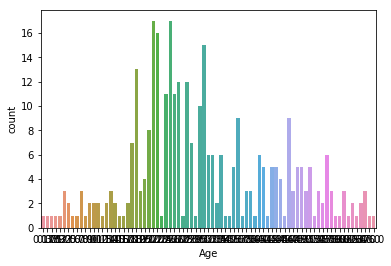

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [30]:
sns.countplot(df2.Age)
plt.show()
df2.Age.unique()

In [31]:
df2["Age"].fillna(0, inplace=True)
df2['Age'].replace(0, 29.8,inplace=True)

In [32]:
df2.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,30.175359,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.635982,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,29.800000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
df2["Fare"].fillna(0, inplace=True)
df2['Fare'].replace(0, 35.63,inplace=True)

In [34]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [35]:
##from test datsset for prediciton
X_test=df2[["Fare",'Age','Sex']]


In [36]:
####trying prediction
DT_y=dtclf.predict(X_test, check_input=True)

In [37]:
dfo=pd.DataFrame(data=df2["PassengerId"])
dfo.head()


,PassengerId
0,892
1,893
2,894
3,895
4,896


In [38]:
dfo["Survived"]=DT_y
dfo.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [39]:
dfo.to_csv("DT_titanic.csv", sep=',',index = False)
####0.71770==kaggle score

In [40]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.7612359550561798

In [41]:
####trying prediction
SVM_y=clf.predict(X_test)

In [42]:
dfo2=pd.DataFrame(data=df2["PassengerId"])
dfo2["Survived"]=SVM_y
dfo2.head()
dfo2.to_csv("SVM_titanic.csv", sep=',',index = False)
##0.76555==kaggle score

In [43]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(features_train,labels_train)
nbclf.score(features_test,labels_test)

0.7443820224719101

In [44]:
NB_y=nbclf.predict(X_test)

In [45]:
dfo3=pd.DataFrame(data=df2["PassengerId"])
dfo3["Survived"]=NB_y
dfo3.head()
dfo3.to_csv("NB2_titanic.csv", sep=',',index = False)
##0.75598==kaggle score

In [46]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=4)
knnclf.fit(features_train,labels_train)
print(knnclf.score(features_test,labels_test))

0.6629213483146067


In [47]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(features_train,labels_train)
clf1.score(features_test,labels_test)

0.7528089887640449

In [48]:
Log_y=clf1.predict(X_test)
dfo4=pd.DataFrame(data=df2["PassengerId"])
dfo4["Survived"]=Log_y
dfo4.head()
dfo4.to_csv("LogReg_titanic.csv", sep=',',index = False)
##0.76076==kaggle score

In [49]:


##in one place

algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
result = []

for clff in clfs:
    clff.fit(features_train,labels_train)
    acc = clff.score(features_test,labels_test)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

,Accuracy
Support Vector Machine,0.761236
Logistic Regression,0.752809
Decision Tree,0.750000
Naive Bayes,0.744382
K Nearest Neighbor,0.662921


In [50]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)


In [51]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)


,Accuracy
Support Vector Machine,0.786249
Logistic Regression,0.781754
Naive Bayes,0.780644
Decision Tree,0.769420
K Nearest Neighbor,0.689607
